# 3.5 - Advanced - Word Embeddings Tutorial Solutions (R)

<img src="media/word_embedding_cover_art.png" width="1000"/>

## Prerequisites

1.  Some familiarity programming in R
2.  Some familarity with natural language processing
3.  No computational text experience necessary!

## Learning outcomes

In the notebook you will 1. Familiarize yourself with concepts such as
word embeddings (WE) vector-space model of language, natural language
processing (NLP), understand how they relate to small and large language
models (LMs) 1. Use critical and reflexive thinking to gain a deeper
understanding of how the inherent social and cultural biases of language
are reproduced and mapped into language computation models 1. Import and
pre-process a textual dataset for use in word embedding 1. Use word2vec
to build a simple language model for examining patterns and biases
textual datasets 1. Identify and select methods for saving and loading
models

## Outline

The goal of this notebook is to demystify some of the technical aspects
of language models and to invite learners to start thinking about how
these important tools function in society.

In particular, this lesson is designed to explore features of word
embeddings produced through the word2vec model. The questions we ask in
this lesson are guided by Ben Schmidt’s blog post, [Rejecting the Gender
Binary](%22http://bookworm.benschmidt.org/posts/2015-10-30-rejecting-the-gender-binary.html).

The primary corpus we will use consists of the
<a href="http://txtlab.org/?p=601">150 English-language novels</a> made
available by the <em>.txtLab</em> at McGill University. We also look at
a <a href="http://ryanheuser.org/word-vectors-1/">Word2Vec model trained
on the ECCO-TCP corpus</a> of 2,350 eighteenth-century literary texts
made available by Ryan Heuser. (Note that the number of terms in the
model has been shortened by half in order to conserve memory.)

## What are Word Embeddings?

Word embeddings are one way that humans can represent language in a way
that is legible to a machine. More specifically, word embeddings are an
NLP approach that uses vectors to store textual data in multiple
dimensions; by existing in the multi-dimensional space of vectors, word
embeddings are able to include important semantic information within a
given numeric representation.

For example, if we are trying to answer a research question about how
popular a term is on the web at a given time, we might use a more
simple, word frequency analysis to count how many times the word
“candidate” shows up in tweets during a defined electoral period.
However, if we wanted to gain a more nuanced understanding of what kind
of language, biases or attitudes contextualize the term, “candidate” in
historical discourse, we would need to use a method like word embedding
to encode meaning into our understanding of how people have talked about
candidates over time. Instead of describing our text as a series of word
counts, we would treat our text like coordinates in space, where similar
words and ideas are closer to each other, and words that are different
from each other are further away.

<figure>
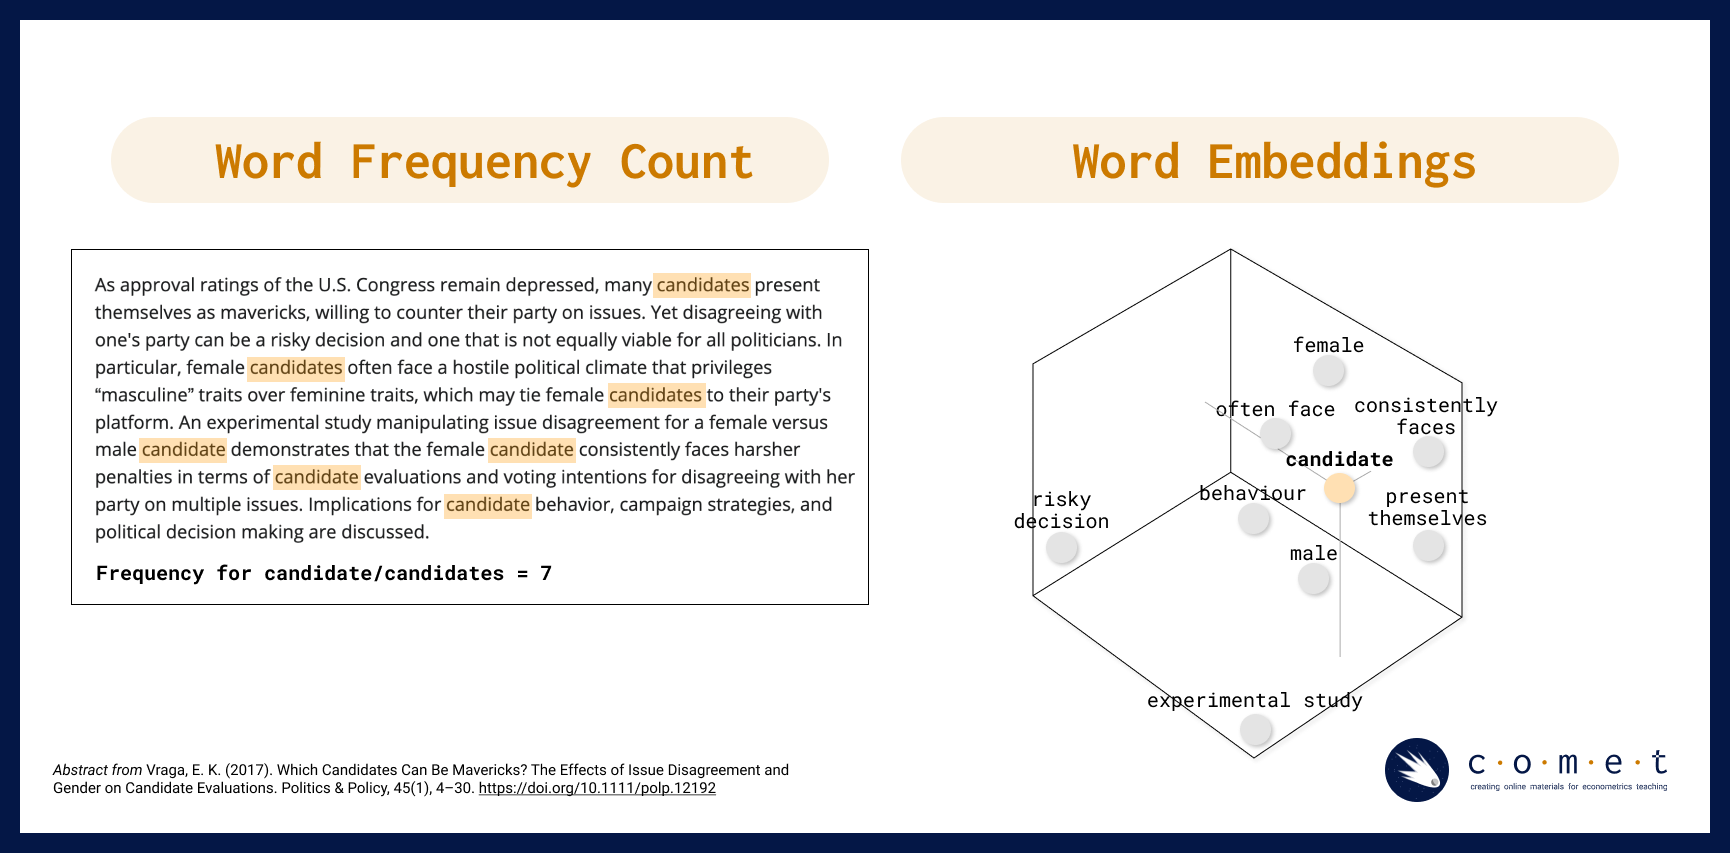
<figcaption aria-hidden="true">Comparing word frequency count and word
embedding methods</figcaption>
</figure>

For example, in the visualization above, a word frequency count returns
the number of times the word “candidate” or “candidates” is used in a
sample text corpus. When a word embedding is made from the same text
corpus, we are able to map related concepts and phrases that are closely
related to “candidate” as neighbours, while other words and phrases such
as “experimental study” (which refers to the research paper in question,
and not to candidates specifically) are further away.

Here is another example of how different, but related words might be
represented in a word embedding: <img src = "media/w2v-Analogies.png">

## Making a Word Embedding

So, how do word embeddings work? To make a word embedding, an input word
gets compressed into a dense vector.

<figure>
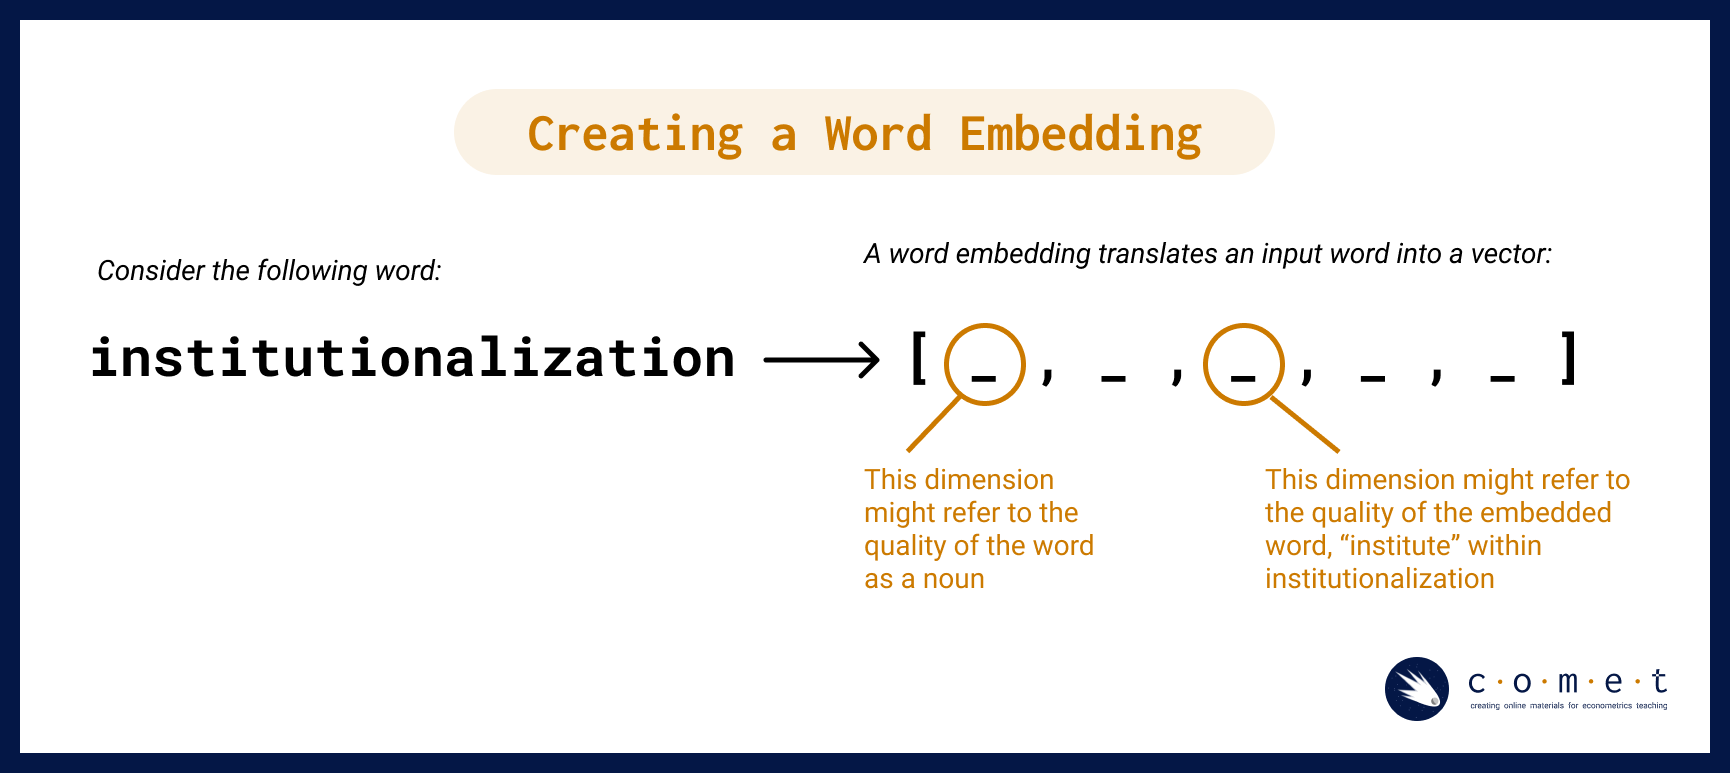
<figcaption aria-hidden="true">Creating a word embedding
vector</figcaption>
</figure>

The magic and mystery of the word embedding process is that often the
vectors produced during the model embed qualities of a word or phrase
that are not interpretable by humans. However, for our purposes, having
the text in vector format is all we need. With this format, we can
perform tests like cosine similarity and other kinds of operations. Such
operations can reveal many different kinds of relationships between
words, as we’ll examine a bit later.

## Using word2vec

Word2vec is an NLP technique that is commonly used to generate word
embeddings. More precisely, word2vec is an algorithmic learning tool
rather than a specific neural net that is already trained. The example
we will be working through today has been made using this tool.

The series of algorithms inside of the word2vec model try to describe
and acquire parameters for a given word in terms of the text that appear
immediately to the right and left in actual sentences. Essentially, it
learns how to predict text.

Without going too deep into the algorithm, suffice it to say that it
involves a two-step process:

1.  First, the input word gets compressed into a dense vector, as seen
    in the simplified diagram, “Creating a Word Embedding,” above.
2.  Second, the vector gets decoded into the set of context words.
    Keywords that appear within similar contexts will have similar
    vector representations in between steps.

Imagine that each word in a novel has its meaning determined by the ones
that surround it in a limited window. For example, in Moby Dick’s first
sentence, “me” is paired on either side by “Call” and “Ishmael.” After
observing the windows around every word in the novel (or many novels),
the computer will notice a pattern in which “me” falls between similar
pairs of words to “her,” “him,” or “them.” Of course, the computer had
gone through a similar process over the words “Call” and “Ishmael,” for
which “me” is reciprocally part of their contexts. This chaining of
signifiers to one another mirrors some of humanists’ most sophisticated
interpretative frameworks of language.

The two main model architectures of Word2Vec are **Continuous Bag of
Words (CBOW)** and **Skip-Gram**, which can be distinguished partly by
their input and output during training.

**CBOW** takes the context words (for example, “Call”,“Ishmael”) as a
single input and tries to predict the word of interest (“me”).

<img src="media/CBOW.gif" width="500"/>

**Skip-Gram** does the opposite, taking a word of interest as its input
(for example, “me”) and tries to learn how to predict its context words
(“Call”,“Ishmael”).

<img src="media/SG.gif" width="500"/>

In general, CBOW is is faster and does well with frequent words, while
Skip-Gram potentially represents rare words better.

Since the word embedding is a vector, we are able perform tests like
cosine similarity (which we’ll learn more about in a bit!) and other
kinds of operations. Those operations can reveal many different kinds of
relationships between words, as we shall see.

## Bias and Language Models

You might already be piecing together that the encoding of meaning in
word embeddings is entirely shaped by patterns of language use. That is,
what is included in a word embedding directly reflects the complex
social and cultural biases of everyday human language - in fact,
exploring how these biases function and change over time (as we will do
later) is one of the most interesting ways to use word embeddings in
social research.

#### It is simply impossible to have a bias-free language model (LM).

In LM’s, bias is not a bug or a glitch, rather, it is an essential
feature that is baked into the fundamental structure. For example,
language models are not outside of learning and absorbing the pejorative
dimensions of language which in turn, can result in reproducing harmful
correlations of meaning for words about race, class or gender (among
others). When unchecked, these harms can be “amplified in downstream
applications of word embeddings” ([Arseniev-Koehler & Foster, 2020,
p. 1](https://osf.io/preprints/socarxiv/b8kud/)).

Just like any other computational model, it is important to critically
engage with the source and context of the training data. One way that
[Schiffers, Kern and Hienert](https://arxiv.org/abs/2302.06174v1)
suggest doing this is by using domain specific models (2023). Working
with models that understand the nuances of your specific topic or field
can better account for “specialized vocabulary and semantic
relationships” that can help make applications of WE more effective.

## Preparing for our Analysis

#### Word2vec Features

**Here are a few features of the word2vec tool that we can use to
customize our analysis:** \* Size: Number of dimensions for word
embedding model

-   Window: Number of context words to observe in each direction
    </li>
-   min_count: Minimum frequency for words included in model
    </li>
-   sg (Skip-Gram): ‘0’ indicates CBOW model; ‘1’ indicates Skip-Gram
    </li>
-   Alpha: Learning rate (initial); prevents model from over-correcting,
    enables finer tuning
    </li>
-   Iterations: Number of passes through dataset
    </li>
-   Batch Size: Number of words to sample from data during each pass
    </li>

Note: the script uses default value for each argument.

**Some limitations of the word2vec Model**

-   Within word2vec, common articles or conjunctions like “the” and
    “and,” may not provide very rich contextual information for a given
    word, and may need additional subsampling or to be combined into a
    word phrase (Anwla, 2019).
-   Word2vec isn’t always the best at handling out-of-vocabulary words
    well (Chandran, 2021).

Let’s begin our analysis!

## Excercise #1: Eggs, Sausages and Bacon

<img src="media/eggs_bacon_sausages.png" width="750"/>

To begin, we are going to load a few packages that are necessary for our
analysis. Please run the code cells below.

``` r
install.packages("ggplot2")
install.packages("repr")
install.packages("proxy")
install.packages("scales")
install.packages("tm")
```

``` r
library(ggplot2)
library(repr) # bug: this one does not always load
```

#### Create a DTM with a Few Pseudo-Texts

To start off, we’re going to create a mini dataframe based on the use of
the words “eggs,” “sausages” and “bacon” found in three different
novels: A, B and C.

``` r
# Construct dataframe
columns <- c('eggs', 'sausage', 'bacon')
indices <- c('Novel A', 'Novel B', 'Novel C')
dtm <- data.frame(eggs = c(50, 90, 20),
                  sausage = c(60, 10, 70),
                  bacon = c(60, 10, 70),
                  row.names = indices)

# Show dataframe
print(dtm)
```

#### Visualize

``` r
# Here, we'll load the required libraries
library(ggplot2)

# Then, we'll create the scatter plot of our data using ggplot2
ggplot(dtm, aes(x = eggs, y = sausage)) +
  geom_point() +
  geom_text(aes(label = rownames(dtm)), nudge_x = 2, nudge_y = 2, size = 3) +
  xlim(0, 100) +
  ylim(0, 100) +
  labs(x = "eggs", y = "sausage")
```

### Vectors

At a glance, a couple of points are lying closer to one another. We used
the word frequencies of just two words in order to plot our texts in a
two-dimensional plane. The term frequency “summaries” of <i>Novel A</i>
& <i>Novel C</i> are pretty similar to one another: they both share a
major concern with “sausage”, whereas <i>Novel B</i> seems to focus
primarily on “eggs.”

This raises a question: how can we operationalize our intuition that
spatial distance expresses topical similarity?

## Cosine Similarity

The most common measurement of distance between points is their [Cosine
Similarity](https://en.wikipedia.org/wiki/Cosine_similarity). Cosine
similarity can operate on textual data that contain term vectors and
allows us to identify how similar the documents are, that is, how much
content overlap they have with one another. For example, imagine that we
were to draw an arrow from the origin of the graph - point (0,0) - to
the dot representing each text. This arrow is called a *vector*.

Mathematically, this can be represented as:

<img src='media/Dot-Product.png' >

Using our example above, we can see that the angle from (0,0) between
Novel C and Novel A (orange triangle) is smaller than between Novel A
and Novel B (navy triangle) or between Novel C and Novel B (both
triangles together).

<img src="media/annotated_scatterplot.png" width="250"/>

Because this similarity measurement uses the cosine of the angle between
vectors, the magnitude is not a matter of concern (this feature is
really helpful for text vectors that can often be really long!).
Instead, the output of cosine similarity yields a value between 0 and 1
(we don’t have to work with something confusing like 18º!) that can be
easily interpreted and compared - and thus we can also avoid the
troubles associated with other dimensional distance measures such as
[Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance).

### Calculating Cosine Distance

``` r
library(proxy)
```

``` r
# Assuming dtm_df is a data frame containing the document-term matrix
dtm_matrix <- as.matrix(dtm)

# Calculate cosine similarity
cos_sim <- proxy::dist(dtm_matrix, method = "cosine")


# Although we want the Cosine Distance, it is mathematically simpler to calculate its opposite: Cosine Similarity
# The formula for Cosine Distance is = 1 - Cosine Similarity

# Convert the cosine similarity matrix to a 2-dimensional array
# So we will subtract the similarities from 1
n <- nrow(dtm_matrix)
cos_sim_array <- matrix(1 - as.vector(as.matrix(cos_sim)), n, n)

# Print the result
print(cos_sim_array)
```

``` r
# And we'll make it a little easier to read

cos_sim_rounded <- round(cos_sim_array, 2)

# Print the rounded cosine similarity matrix
print(cos_sim_rounded)
```

## Excercise #2: Working with 18th Century Literature

<img src="media/18th_cent_literature.png" width="750"/>

``` r
# Load required libraries
library(tm)
library(tidyverse)

# File paths and names
filelist <- c(
  'txtlab_Novel450_English/EN_1850_Hawthorne,Nathaniel_TheScarletLetter_Novel.txt',
  'txtlab_Novel450_English/EN_1851_Hawthorne,Nathaniel_TheHouseoftheSevenGables_Novel.txt',
  'txtlab_Novel450_English/EN_1920_Fitzgerald,FScott_ThisSideofParadise_Novel.txt',
  'txtlab_Novel450_English/EN_1922_Fitzgerald,FScott_TheBeautifulandtheDamned_Novel.txt',
  'txtlab_Novel450_English/EN_1811_Austen,Jane_SenseandSensibility_Novel.txt',
  'txtlab_Novel450_English/EN_1813_Austen,Jane_PrideandPrejudice_Novel.txt'
)

novel_names <- c(
  'Hawthorne: Scarlet Letter',
  'Hawthorne: Seven Gables',
  'Fitzgerald: This Side of Paradise',
  'Fitzgerald: Beautiful and the Damned',
  'Austen: Sense and Sensibility',
  'Austen: Pride and Prejudice'
)

# Function to read non-empty lines from the text file
readNonEmptyLines <- function(filepath) {
  lines <- readLines(filepath, encoding = "UTF-8")
  non_empty_lines <- lines[trimws(lines) != ""]
  return(paste(non_empty_lines, collapse = " "))
}

# Read non-empty texts into a corpus
text_corpus <- Corpus(VectorSource(sapply(filelist, readNonEmptyLines)))

# Preprocess the text data
text_corpus <- tm_map(text_corpus, content_transformer(tolower))
text_corpus <- tm_map(text_corpus, removePunctuation)
text_corpus <- tm_map(text_corpus, removeNumbers)
text_corpus <- tm_map(text_corpus, removeWords, stopwords("english"))
text_corpus <- tm_map(text_corpus, stripWhitespace)

# Create a custom control for DocumentTermMatrix with binary term frequency
custom_control <- list(
  tokenize = function(x) ngram_tokenize(x, n = 1),
  bounds = list(global = c(3, Inf)),
  weighting = weightTf
)

# Convert the corpus to a document-term matrix (DTM) using custom control
dtm <- DocumentTermMatrix(text_corpus, control = custom_control)

# Convert DTM to a binary data frame (0 or 1)
dtm_df_novel <- as.data.frame(as.matrix(dtm > 0))
colnames(dtm_df_novel) <- colnames(dtm)

# Set row names to novel names
rownames(dtm_df_novel) <- novel_names

# Print the resulting data frame
head(dtm_df_novel)
```

``` r
cos_sim_novel <- as.matrix(proxy::dist(dtm_df_novel, method = "cosine"))

# Convert the cosine similarity matrix to a 2-dimensional array
n <- nrow(dtm_df_novel)
cos_sim_array <- matrix(1 - as.vector(as.matrix(cos_sim_novel)), n, n)

# Round the cosine similarity matrix to two decimal places
cos_sim_novel_rounded <- round(cos_sim_array, 2)

# Print the rounded cosine similarity matrix
print(cos_sim_novel_rounded)
```

``` r
# Create the DataFrame with cosine similarity values
cos_df <- data.frame(cos_sim_novel_rounded, row.names = novel_names, check.names = FALSE)

# Set column names to novel names
colnames(cos_df) <- novel_names

# Print the DataFrame
head(cos_df)
```

``` r
library(scales)

# Load required libraries
library(ggplot2)

# Transform cosine similarity to cosine distance
cos_dist <- 1 - cos_sim_novel_rounded

# Perform MDS
mds <- cmdscale(cos_dist, k = 2)

# Extract x and y coordinates from MDS output
xs <- mds[, 1]
ys <- mds[, 2]

# Create a data frame with x, y coordinates, and novel names
mds_df <- data.frame(x = xs, y = ys, novel_names = novel_names)

ggplot(mds_df, aes(x, y, label = novel_names)) +
  geom_point(size = 4) +
  geom_text(hjust =0.6, vjust = 0.2, size = 4, angle = 45, nudge_y = 0.01) +  # Rotate text and adjust y position
  labs(title = "MDS Visualization of Novel Differences") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, hjust = 0.6, margin = margin(b = 10)),
    plot.margin = margin(5, 5, 5, 5, "pt"),  # Adjust the margin around the plot
    plot.background = element_rect(fill = "white"),  # Set the background color of the plot to white
    plot.caption = element_blank(),  # Remove the default caption
    axis.text = element_text(size = 12),  # Adjust the size of axis text
    legend.text = element_text(size = 12),  # Adjust the size of legend text
    legend.title = element_text(size = 14)  # Adjust the size of legend title
  )
```

The above method has a broad range of applications, such as unsupervised
clustering. Common techniques include
<a href = "https://en.wikipedia.org/wiki/K-means_clustering">K-Means
Clustering</a> and
<a href="https://en.wikipedia.org/wiki/Hierarchical_clustering">Heirchical
Dendrograms</a>. These attempt to identify groups of texts with shared
content, based on these kinds of distance measures.

Here’s an example of a dendrogram based on these six novels:

``` r
# Assuming you have already calculated the "cos_dist" matrix and have the "novel_names" vector

# Perform hierarchical clustering
hclust_result <- hclust(as.dist(cos_dist), method = "ward.D")

# Plot the dendrogram
plot(hclust_result, hang = -1, labels = novel_names)

# Optional: Adjust the layout to avoid cutoff labels
par(mar = c(5, 4, 2, 10))  # Adjust margins

# Display the dendrogram plot
```

#### Vector Semantics

We can also turn this logic on its head. Rather than produce vectors
representing texts based on their words, we will produce vectors for the
words based on their contexts.

``` r
# Transpose the DTM data frame
transposed_dtm <- t(dtm_df_novel)

# Display the first few rows of the transposed DTM
head(transposed_dtm)
```

``` r
# Assuming dtm_df is a data frame containing the document-term matrix
dtm_matrix <- as.matrix(transposed_dtm)

# Calculate cosine similarity
cos_sim_words <- proxy::dist(dtm_matrix, method = "cosine")

# Convert the cosine similarity matrix to a 2-dimensional array
n <- nrow(dtm_matrix)
cos_sim_array <- matrix(1 - as.vector(as.matrix(cos_sim_words)), n, n)

# Print the result
head(cos_sim_array)
```

``` r
# In readable format

cos_sim_words_rounded <- round(cos_sim_array, 2)

head(cos_sim_words_rounded)
```

Theoretically we could visualize and cluster these as well - but it
would a lot of computational power!

We’ll instead turn to the machine learning version: word embeddings

This last cell indicates that “sausage” and “bacon” perfectly align with
one another across texts. If we saw this in a real-world example, we
might interpret it to mean that the words share some kind of semantic or
thematic relationship. In fact, this method is precisely one that
humanists have used in order to find interesting linguistic patterns.
(See Ted Underwood’s blog post,
<a href = "https://tedunderwood.com/2011/10/16/lsa-is-a-marvellous-tool-but-humanists-may-no-use-it-the-way-computer-scientists-do/">LSA
is a marvellous tool, but…</a>.)

## Exercise #3: Using Word2vec with 150 English Novels

#### Corpus Description

English-language subset of Andrew Piper’s novel corpus, totaling 150
novels by British and American authors spanning the years 1771-1930.
These texts reside on disk, each in a separate plaintext file. Metadata
is contained in a spreadsheet distributed with the novel files.

#### Metadata Columns

<ol>

<li>

Filename: Name of file on disk

</li>

<li>

ID: Unique ID in Piper corpus

</li>

<li>

Language: Language of novel

</li>

<li>

Date: Initial publication date

</li>

<li>

Title: Title of novel

</li>

<li>

Gender: Authorial gender

</li>

<li>

Person: Textual perspective

</li>

<li>

Length: Number of tokens in novel

</li>

</ol>

#### Import Metadata

``` r
# Import Metadata into Pandas Dataframe

meta_df <- read.csv('resources/txtlab_Novel450_English.csv', encoding = 'UTF-8')
```

``` r
# Check Metadata

head(meta_df)
```

#### Import Corpus

``` r
# Set the path to the 'fiction_folder'
fiction_folder <- "txtlab_Novel450_English/"

# Create a list to store the file paths
file_paths <- list.files(fiction_folder, full.names = TRUE)

# Read all the files as a list of single strings
novel_list <- lapply(file_paths, function(filepath) {
  readChar(filepath, file.info(filepath)$size)
})
```

``` r
# Inspect first item in novel_list
cat(substr(novel_list[[1]], 1, 500))
```

#### Pre-Processing

Word2Vec learns about the relationships among words by observing them in
context. This means that we want to split our texts into word-units.
However, we want to maintain sentence boundaries as well, since the last
word of the previous sentence might skew the meaning of the next
sentence.

Since novels were imported as single strings, we’ll first need to divide
them into sentences, and second, we’ll split each sentence into its own
list of words.

``` r
install.packages("stringr")

# Load the 'stringr' package
library(stringr)

# Define a regular expression pattern for sentence splitting
sentence_pattern <- "[^.!?]+(?<!\\w\\w\\w\\.)[.!?]"

# Split each novel into sentences
sentences <- unlist(lapply(novel_list, function(novel) {
  str_extract_all(novel, sentence_pattern)[[1]]
}))
```

``` r
first_sentence <- sentences[1]
print(first_sentence)
```

We are defining a function called fast_tokenize, we will be using this
function later when we train the word vector model. See example usage
for its feature.

``` r
fast_tokenize <- function(text) {
  
  # Load the required stringr package for string manipulation
  library(stringr)
  
  # Define a character vector of punctuation marks
  punctuation <- strsplit(stringr::boundary("word"), "")[[1]]
  
  lower_case <- tolower(text)
  
  # Remove punctuation characters
  no_punct <- gsub(paste0(punctuation, collapse = "|"), "", lower_case)
  
  # Split text over whitespace into a character vector of words
  tokens <- strsplit(no_punct, "\\s+")[[1]]
  
  return(tokens)
}

# Example usage
text <- "Hello, world! This is an example sentence."
tokens <- fast_tokenize(text)
print(tokens)
```

``` r
# Split each sentence into tokens
# this will take 1-2 minutes

words_by_sentence <- lapply(sentences, function(sentence) {
  fast_tokenize(sentence)
})
```

``` r
# Remove any sentences that contain zero tokens
words_by_sentence <- words_by_sentence[sapply(words_by_sentence, length) > 0]
```

``` r
# Inspect first sentence

first_sentence_tokens <- words_by_sentence[[1]]
print(first_sentence_tokens)
```

## Training

``` r
# This code below might take 3 minutes.

# Load the 'reticulate' package
library(reticulate)

# Import the 'gensim' library
gensim <- import("gensim")

# Train word2vec model from txtLab corpus
model <- gensim$models$Word2Vec(words_by_sentence, vector_size=100L, window=5L, min_count=25L, sg=1L, alpha=0.025, epochs=5L, batch_words=10000L)
```

## Embeddings – the output here is very different than the py version, even though the model is using the same parameters and same input, which is *sentences*

``` r
# Return dense word vector
vector <- model$wv$get_vector("whale")
vector
```

## Vector-Space Operations

### Similarity

Since words are represented as dense vectors, we can ask how similiar
words’ meanings are based on their cosine similarity (essentially how
much they overlap). <em>gensim</em> has a few out-of-the-box functions
that enable different kinds of comparisons.

``` r
# Find cosine distance between two given word vectors

similarity <- model$wv$similarity("pride", "prejudice")
similarity
```

``` r
# Find nearest word vectors by cosine distance

most_similar <- model$wv$most_similar("pride")
most_similar
```

``` r
# Given a list of words, we can ask which doesn't belong

# Finds mean vector of words in list
# and identifies the word further from that mean

doesnt_match <- model$wv$doesnt_match(c('pride', 'prejudice', 'whale'))
doesnt_match
```

## Multiple Valences

A word embedding may encode both primary and secondary meanings that are
both present at the same time. In order to identify secondary meanings
in a word, we can subtract the vectors of primary (or simply unwanted)
meanings. For example, we may wish to remove the sense of <em>river
bank</em> from the word <em>bank</em>. This would be written
mathetmatically as <em>RIVER - BANK</em>, which in <em>gensim</em>’s
interface lists <em>RIVER</em> as a positive meaning and <em>BANK</em>
as a negative one.

``` r
# Get most similar words to BANK, in order
# to get a sense for its primary meaning

most_similar <- model$wv$most_similar("bank")
most_similar
```

``` r
# Remove the sense of "river bank" from "bank" and see what is left

result <- model$wv$most_similar(positive = "bank", negative = "river")

result
```

## Analogy

Analogies are rendered as simple mathematical operations in vector
space. For example, the canonic word2vec analogy <em>MAN is to KING as
WOMAN is to ??</em> is rendered as <em>KING - MAN + WOMAN</em>. In the
gensim interface, we designate <em>KING</em> and <em>WOMAN</em> as
positive terms and <em>MAN</em> as a negative term, since it is
subtracted from those.

``` r
# Get most similar words to KING, in order
# to get a sense for its primary meaning

most_similar <- model$wv$most_similar("king")
most_similar
```

``` r
# The canonic word2vec analogy: King - Man + Woman -> Queen

result <- model$wv$most_similar(positive = c("woman", "king"), negative = "man")
result
```

### Gendered Vectors

Can we find gender a la Schmidt (2015)? (Note that this method uses
vector projection, whereas Schmidt had used rejection.)

``` r
# Feminine Vector

result <- model$wv$most_similar(positive = c("she", "her", "hers", "herself"), negative = c("he", "him", "his", "himself"))
result
```

``` r
# Masculine Vector

result <- model$wv$most_similar(positive = c("he", "him", "his", "himself"), negative = c("she", "her", "hers", "herself"))
result
```

## Visualization

``` r
# Note: due to some discrepencies between python and R, this may not be translated exactly
# Dictionary of words in model

key_to_index <- model$wv$key_to_index
head(key_to_index)
```

``` r
# Visualizing the whole vocabulary would make it hard to read

key_to_index <- model$wv$key_to_index

# Get the number of unique words in the vocabulary (vocabulary size)
vocabulary_size <- length(key_to_index)
vocabulary_size
```

``` r
# Find most similar tokens
similarity_result <- model$wv$most_similar(positive = c("she", "her", "hers", "herself"),
                                           negative = c("he", "him", "his", "himself"),
                                           topn = as.integer(50))  # Convert to integer

# Extract tokens from the result
her_tokens <- sapply(similarity_result, function(item) item[1])
```

``` r
her_tokens_first_15 <- her_tokens[1:15]
```

``` r
# Inspect list
her_tokens_first_15
```

``` r
# Get the vector for each sampled word

vectors <- lapply(her_tokens, function(word) model$wv$get_vector(word))

# Convert the list of vectors to a matrix
vectors_matrix <- do.call(rbind, vectors)

# Print the vectors matrix
head(vectors_matrix)
```

``` r
# Calculate distances among texts in vector space

dist_matrix <- proxy::dist(vectors_matrix, method = "cosine")

# Print the distance matrix
head(dist_matrix)
```

``` r
# Multi-Dimensional Scaling (Project vectors into 2-D)
install.packages("MASS")

library(MASS)

# ... Previous code to compute dist_matrix ...

# Perform Multi-Dimensional Scaling (MDS)
mds <- cmdscale(dist_matrix, k = 2)

# Print the resulting MDS embeddings
head(mds)
```

``` r
plot_data <- data.frame(x = mds[, 1], y = mds[, 2], label = her_tokens)

# Create the scatter plot with text labels using ggplot2
p <- ggplot(plot_data, aes(x = x, y = y, label = label)) +
  geom_point(alpha = 0) +
  geom_text(nudge_x = 0.02, nudge_y = 0.02) +
  theme_minimal()

# Print the plot
print(p)
```

``` r
# For comparison, here is the same graph using a masculine-pronoun vector

his_tokens = [token for token,weight in model.wv.most_similar(positive=['he','him','his','himself'], \
                                                       negative=['she','her','hers','herself'], topn=50)]
vectors = [model.wv.get_vector(word) for word in his_tokens]
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')
mds = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds.fit_transform(dist_matrix)
_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(his_tokens[i], ((embeddings[i,0], embeddings[i,1])))
```

Q. What kinds of semantic relationships exist in the diagram above?

Are there any words that seem out of place?

## 3. Saving/Loading Models

``` r
# Save current model for later use

model$wv$save_word2vec_format('resources/word2vec.txtlab_Novel150_English.txt')
#model.save_word2vec_format('resources/word2vec.txtlab_Novel150_English.txt') # deprecated
```

``` r
# Load up models from disk

# Model trained on Eighteenth Century Collections Online corpus (~2500 texts)
# Made available by Ryan Heuser: http://ryanheuser.org/word-vectors-1/

ecco_model <- gensim$models$KeyedVectors$load_word2vec_format('resources/word2vec.ECCO-TCP.txt')
#ecco_model = gensim.models.Word2Vec.load_word2vec_format('resources/word2vec.ECCO-TCP.txt') # deprecated
```

``` r
# What are similar words to BANK?

ecco_model$most_similar('bank')
```

``` r
# What if we remove the sense of "river bank"?
ecco_model$most_similar(positive = list('bank'), negative = list('river'))
```

## Exercises!

See if you can attempt the following exercises on your own!

``` r
## EX. Use the most_similar method to find the tokens nearest to 'car' in either model.
##     Do the same for 'motorcar'.

## Q.  What characterizes these two words inthe corpus? Does this make sense?

model$wv$most_similar("car")
```

``` r
model$wv$most_similar('motorcar')
```

``` r
## EX. How does our model answer the analogy: MADRID is to SPAIN as PARIS is to __________

## Q.  What has our model learned about nation-states?


model$wv$most_similar(positive = c('paris', 'spain'), negative = c('madrid'))
```

``` r
## EX. Perform the canonic Word2Vec addition again but leave out a term:
##     Try 'king' - 'man', 'woman' - 'man', 'woman' + 'king'

## Q.  What do these indicate semantically?

model$wv$most_similar(positive = c('woman'), negative = c('man'))
```

``` r
## EX. Heuser's blog post explores an analogy in eighteenth-century thought that
##     RICHES are to VIRTUE what LEARNING is to GENIUS. How true is this in
##     the ECCO-trained Word2Vec model? Is it true in the one we trained?

##  Q. How might we compare word2vec models more generally?
```

``` r
# ECCO model: RICHES are to VIRTUE what LEARNING is to ??

ecco_model$most_similar(positive = c('learning', 'virtue'), negative = c('riches'))
```

``` r
# txtLab model: RICHES are to VIRTUE what LEARNING is to ??
model$wv$most_similar(positive = c('learning', 'virtue'), negative = c('riches'))
```

## Concluding Remarks and Resources

Throughout this notebook we have seen how a number of mathematical
operations can be used to explore word2vec’s word embeddings. Getting
inside the technics of this computational process can enable us to
answer a set of new, interesting questions dealing with semantics, and
yet there are many other questions that remain unanswered.

For example:

<ol>

<li>

How to compare word usages in different texts (within the same model)?

</li>

<li>

How to compare word meanings in different models? compare whole models?

</li>

<li>

What about the space “in between” words?

</li>

<li>

Do we agree with the Distributional Hypothesis that words with the same
contexts share their meanings?

</li>

<ol>

<li>

If not, then what information do we think is encoded in a word’s
context?

</li>

</ol>

<li>

What good, humanistic research questions do analogies shed light on?

</li>

<ol>

<li>

shades of meaning?

</li>

<li>

context similarity?

</li>

</ol>

</ol>

## References

This notebook has been built using the following materials: -
Arseniev-Koehler, A., & Foster, J. G. (2020). Sociolinguistic Properties
of Word Embeddings \[Preprint\]. SocArXiv.
https://doi.org/10.31235/osf.io/b8kud - Schiffers, R., Kern, D., &
Hienert, D. (2023). Evaluation of Word Embeddings for the Social
Sciences (arXiv:2302.06174). arXiv. http://arxiv.org/abs/2302.06174

-   [TensorFlow word2vec
    tutorial](https://www.tensorflow.org/text/tutorials/word2vec)

-   Anwla, P. K. (2019, October 22). Challenges in word2vec Model.
    TowardsMachineLearning.
    https://towardsmachinelearning.org/performance-problems-in-word2vec-model/

-   Chandran, S. (2021, November 16). Introduction to Text
    Representations for Language Processing—Part 2. Medium.
    https://towardsdatascience.com/introduction-to-text-representations-for-language-processing-part-2-54fe6907868